# Global Sertlik Matrisi ve Global Kuvvet Vektörünün Elde Edilmesi ve Sınır Koşullarının Uygulanması

## Global Sertlik Matrisi ve Global Kuvvet Vektörünün Oluşturulması


4.e bölümünde bir boyutlu elastik çubuğun eksenel yük altında şekil değiştirmesi problemi için yerel sertlik matrisini ve yerel kuvvet vektörünü elde etmiştik. Bu bölümde global sertlik matrisini ve global kuvvet vektörünü elde edeceğiz. Daha sonra global sertlik matrisini ve global kuvvet vektörünü sınır koşullarını uygulamak için nasıl manipüle edeceğimizi göreceğiz. 

Şimdi global sertlik matrisini elde edebilmek için birleştirme (assembly) işlemini yapacağız. Bu işlemin mantığını anlamak için yine 0.4-0.6 aralığını dikkate alalım. Bu aralık için yerel rijitlik matrisini çıkardığımızda 2x2 boyutlarındaki aşağıdaki matrisi elde etmiştik:

$$ \mathbf{K}^e=\pm \frac{AE}{h}\begin{bmatrix}
1 & -1\\
-1 & 1
\end{bmatrix}  \tag{1}$$

Şimdi birleştirme işleminin mantığını anlayabilmek için 0.4-0.8 aralığında baz fonksiyonlarını çizdirelim. Lejantta yerel baz fonksiyonlarında kullandığımız üst indis elemen numarasını, alt indis ise baz fonksiyonu numarasını ifade eder. 

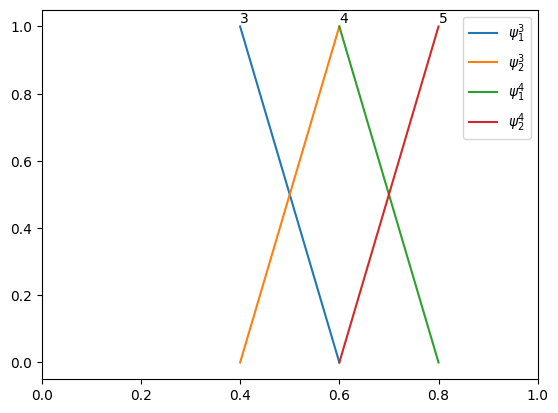

In [102]:
import numpy as np
import matplotlib.pyplot as plt
sekil=[[1,0],[0,1]]
plt.plot([0.4,0.6],sekil)
plt.plot([0.6,0.8],sekil)
plt.xlim(0,1)
plt.legend(['$\psi_{1}^{3}$','$\psi_{2}^{3}$','$\psi_{1}^{4}$','$\psi_{2}^{4}$'])
plt.text(0.4,1.01,3);
plt.text(0.6,1.01,4);
plt.text(0.8,1.01,5);

Şimdi $0.4-0.6$ aralığındaki 3 numaralı elemana odaklanalım. Bu aralıkta 3. ve 4. baz fonksiyonlarını görüyoruz. 3. baz fonksiyonunun negatif eğimli parçası (mavi çizgi) yerel baz fonksiyonu olarak $\psi_1^3$'e denk geliyor. 4. baz fonksiyonunun pozitif eğimli parçası ise (turuncu çizgi) yerelde $\psi_2^3$'ye karşılık gelmektedir. 3 numaralı eleman için yerel sertlik matrisi denklem (1) kullanılarak kolaylıkla yazılır. Peki global sertlik matriste bu yerel matris neye karşılık gelecektir? Ya da global sertlik matrisinin boyutları nedir? Öncelikle global matrisin boyutlarından başlayalım. 4.c bölümde diferansiyel denklemimizi Galerkin Yöntemi ile yaklaşık olarak çözmeye çalışırken test ve deneme fonksiyonlarını baz fonksiyonlarının toplamı cinsinden yaklaşık olarak ifade etmiş, bölümün sonunda sertlik matrisini ve kuvvet vektörünü bulmuştuk. Bulmuş olduğumuz sertlik matrisi global sertlik matrisi, kuvvet vektörü ise global kuvvet vektörüdür. 4.c bölümündeki denklem (9)'dan görülebileceği üzere $\mathbf{K}$ n x n boyutlarında, $\mathbf{f}$ ise n x 1  boyutlarındadır. n burada kullanılan baz fonksiyonu sayısını ifade ediyordu. 4.d bölümünde görülebileceği üzere baz fonksiyonu sayısı düğüm noktası sayısına eşittir. Düğüm noktasındaki değerler (4.c bölümünde denklem(9)'u çözdüğümüzde elde ettiğimiz $\mathbf{u}$) baz fonksiyonlarının önündeki katsayılardır. O yüzden her düğüm noktasına karşılık gelen bir baz fonksiyonu mevcuttur.

Şimdi geriye elde ettiğimiz yerel sertlik matrisinin global sertlik matrisinde uygun yere yerleştirilmesi kalmıştır. Yukarıdaki şekilden görülebileceği üzere 3. elemanda bulunan $\psi_1^3$ ve $\psi_2^3$ yerel baz fonksiyonları sırasıyla 3. ve 4. düğüm noktalarına katkı yapmaktadır. O yüzden 2 x 2 yerel sertlik matrisini global sertlik matrisinde 3. ve 4. satır ve 3. ve 4. sütuna denk gelecek şekilde yerleştirmek gerekir. Aynı şekilde 4. elemandan elde ettiğimiz yerel sertlik matrisini, global matriste  4. ve 5. satır ve 4. ve 5. sütuna yerleştirmemiz gerekecektir. Buradan hızlıca 4. düğüm noktasına hem 3. elemanın hem de 4. elemanın sertlik matrisinden katkı geldiği gözükür (sırasıyla $ \mathbf{K}_{22}^3$ ve $\mathbf{K}_{11}^4$).

Yerel kuvvet vektörünün global kuvvet vektörüne yerleştirilmesinde değişen bir işlem yoktor. 3. eleman için elde edilen 2 x 1 boyutlarındaki yerel kuvvet vektörü 3. ve 4. düğüm noktalarına katkı yapar, bu yüzden n x 1 boyutlarındaki global kuvvet vektöründe 3. ve 4. satıra yerleştirilir. 

Bu işlemleri kodlamak oldukça basittir. Bir boyutlu elastik çubuğun eksenel yük altında şekil değiştirmesi problemi için verilen geometri (A ve l), malzeme özellikleri (E), ve yükleme (b) bilgisi doğrultusunda yerel sertlik matrisini ve yerel kuvvet vektörünü hesaplayan hesaplayan kodu yazalım:

In [103]:
import numpy as np

class BirBoyutluCubuk:
    def __init__(self, uzunluk, eleman_sayısı, E, A, b):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.E = E
        self.A = A
        self.b = b
        
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS) # ağdaki noktaların koordinatları
        self.k_e = (self.A*self.E/self.h)*np.array([[1, -1], [-1, 1]]) # yerel rijitlik matrisi 
        self.f_e = self.b*self.h*0.5**np.array([[1],[1]]) # yerel kuvvet vektörü

Şimdi geometri, malzeme özellilerini ve yükleme bilgisini tanımlalım ve yerel sertlik matrisi ve yerel kuvvet vektörümüzü hesaplayalım ve sonucunu görüntüleyelim:

In [104]:
uzunluk= 10 # çubuk uzunluğu m
eleman_sayısı=5 
E= 30e9 # elastisite modülü Pa
A= 0.5 # kesit alanı m^2
b=10000 # düzgün yayılı yük N/m
cubuk=BirBoyutluCubuk(uzunluk,eleman_sayısı,E,A,b)
print(cubuk.k_e)
print(cubuk.f_e)

[[ 7.5e+09 -7.5e+09]
 [-7.5e+09  7.5e+09]]
[[10000.]
 [10000.]]


Şimdi yerel sertlik matrislerini ve yerel kuvvet vektörlerini kullanarak global sertlik matrisini ve global kuvvet vektörünü hesaplayalım. Burada problemi basit tutmak adına çubuk boyunca herhangi bir geometri, malzeme yada yükleme değişikliği yapılmamıştır. O yüzden bütün elemanlar için yerel matrisler aynı olacaktır ve bir defa hesaplanacaktır.

In [105]:
def K_oluştur(cubuk):
    
    K = np.zeros((cubuk.NS, cubuk.NS))
    
    for element in range(cubuk.ES):
        K[element:element + 2, element:element + 2] += cubuk.k_e
        
    return K

Ke = K_oluştur(cubuk)
print(Ke)

def f_oluştur(cubuk):
    
    f = np.zeros((cubuk.NS,1))

    for element in range(cubuk.ES):

        f[element:element + 2] += cubuk.f_e
    
    return f

fe = f_oluştur(cubuk)
print(fe)

[[ 7.5e+09 -7.5e+09  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [-7.5e+09  1.5e+10 -7.5e+09  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00 -7.5e+09  1.5e+10 -7.5e+09  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -7.5e+09  1.5e+10 -7.5e+09  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00 -7.5e+09  1.5e+10 -7.5e+09]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00 -7.5e+09  7.5e+09]]
[[10000.]
 [20000.]
 [20000.]
 [20000.]
 [20000.]
 [10000.]]


## Sınır Koşullarının Uygulanması

Denklem sistemimizi çözmeden önce son olarak sınır koşullarının uygulanmasını göreceğiz. 4.b bölümünde Neumann (doğal) ve Dirichlet (esas) adlı iki farklı tip sınır koşulu tipinden bahsetmiştik. Diferansiyel denklem için verilen sınır koşulları en genel hali ile bu iki farklı sınır koşulu tipinin kombinasyonu olarak yazılabilir ve genel (general) sınır koşulu olarak adlandırılır. Yani sınır koşulu bir noktada hem çözüm $u(x)$ hem de çözümün türevi $\frac{du}{dx}$ ifade edilir. Bu genel sınır koşulu $x=0$ ve $x=l$ noktalarında aşağıdaki gibi yazılabilir:

$$\alpha_0\frac{du(0)}{dx}+\beta_0u(0)=\gamma_0 \quad \quad \alpha_l\frac{du(l)}{dx}+\beta_lu(l)=\gamma_l. \tag{2}$$

Şimdi denklem (2) aşağıdaki gibi yazılabilir:

$$ \frac{du(0)}{dx}=\frac{\gamma_0-\beta_0u(0)}{\alpha_0} \quad \quad \frac{du(l)}{dx}=\frac{\gamma_l-\beta_lu(l)}{\alpha_l}. \tag{3}$$

Bölüm 4.b'de zayıf formu elde ederken kısmi integrasyon yöntemini kullanmıştık ve bu işlem sonrası aşağıdaki denklemi elde etmiştik:

$$ \left(vAE\frac{du}{dx}\right) \Big|_0^l +\int_{0}^{l}vb\,dx\ = \int_{0}^{l} \frac{dv}{dx}AE\frac{du}{dx} \,dx. \tag{4} $$

Buradaki 2. ve 3. terim bu bölümde elde ettiğimiz global kuvvet vektörü ve  global sertlik matrisidir. 1. terim ise denklem (3)'teki ifadeler cinsinden kolaylıkla aşağıdaki gibi yazılabilir:

$$ \left(vAE\frac{du}{dx}\right) \Big|_0^l=vAE\frac{\gamma_l-\beta_lu(l)}{\alpha_l}-vAE\frac{\gamma_0-\beta_0u(0)}{\alpha_0}. \tag{5}$$

Denklem (5)'teki ifadeler 1. ve sonuncu elemanda olduğu için global sertlik matrisinin $\mathbf{K}_{11}$ ve $\mathbf{K}_{nn}$ elemanlarını etkileyecektir. Aynı şekilde global kuvvet vektörünün sadece  $\mathbf{f}_{1}$ ve $\mathbf{f}_{n}$ elemanları değişecektir. $\mathbf{K}$ matrisi $\mathbf{u}$ vektörü ile çarpıldığı için denklem (3)'teki u(x)'li ifadeleri $\mathbf{K}$  matrisi içerisine, diğer ifadeleri $\mathbf{f}$ vektörü içerisine almak gerekir. O yüzden denklem (5)'teki ifadeleri denklem (4)'te yerine koyar ve denklemi tekrar düzenlersek:

$$ vAE\frac{\gamma_l}{\alpha_l}-vAE\frac{\gamma_0}{\alpha_0} +\int_{0}^{l}vb\,dx\ = \int_{0}^{l} \frac{dv}{dx}AE\frac{du}{dx} \,dx\ +vAE\frac{\beta_lu(l)}{\alpha_l}-vAE\frac{\beta_0u(0)}{\alpha_0}\tag{6} $$

elde ederiz. Buradan $\mathbf{K}$ matrisini ve $\mathbf{f}$ vektörünü sınır koşullarına göre düzenlerken, sınır koşulundan gelen değerleri toplayacak mıyız yoksa çıkaracak mıyız kolaylıkla karar verebiliriz. Bir hatırlatma olarak Neumann yada Dirichlet sınır koşulları genel sınır koşulunun özel durumu olur. Neumann sınır koşulu için $\beta=0$ ve Dirichlet için ise $\alpha=0$ olur. 

Global sertlik matrisi ve global kuvvet vektörü üzerindeki sınır koşulu değişikliklerini aşağıdaki gibi kodlayabiliriz:

In [106]:
def sınır_uygula(cubuk,Ke,fe,alpha,beta,gamma):
    K_ = Ke.copy()
    f_ = fe.copy()
    for i in range(2):
        x=-1*i
        if alpha[i] == 0:
            alpha_=10**-10
        else:
            alpha_=alpha[i]
        K_[x,x]+= (-1)**(i+1)*beta[i]*cubuk.A*cubuk.E/alpha_
        f_[x]+= (-1)**(i+1)*gamma[i]*cubuk.A*cubuk.E/alpha_

    return K_,f_

Burada özellikle belirtilmesi gereken durum sınır koşulunun Dirichlet tipi olduğu yani $\alpha=0$ olduğu durumdur. Burada Dirichlet tipi sınır koşulunu uygulamak için penaltı yöntemi kullanılmıştır. Bu yöntem Payne-Irons yöntemi olarak da geçer. Burada $\alpha=0$ olduğunda, $\alpha$ sıfır yerine çok küçük bir sayı olarak alınır alınır. Çok küçük bir sayıya bölümden çok büyük bir sayı elde edilir ve bu sayede global sertlik matrisinin ve global kuvvet vektörünün değiştirilen elemanına çok büyük bir sayı eklenmiş olur. Örneğin Dirichlet sınır koşulu $x=0$ noktasında tanımlanmış olsun. O zaman global sertlik matrisinin ilk satırını kullanarak elde edeceğimiz denklem aşağıdaki gibi olur:

$$\left(\mathbf{K}_{11}^e-AE\frac{\beta_0u(0)}{\alpha_0}\right)\mathbf{u}_1+\mathbf{K}_{12}^e\mathbf{u}_2=\mathbf{f}_1^e-AE\frac{\gamma_0}{\alpha_0} \tag{7}$$

Sol tarafta $\mathbf{K}_{11}^e\mathbf{u}_1$ terimi sağda ise $\mathbf{f}_1^e$ görece diğer terimlere göre ufak kalacağı için Denklem (7) yaklaşık olarak aşağıdaki ifadeye eşit olacaktır:

$$\left(-AE\frac{\beta_0u(0)}{\alpha_0}\right)\mathbf{u}_1=-AE\frac{\gamma_0}{\alpha_0} \tag{8}$$

Denklem (8) açıkca $u(0)$'ı bir değere eşitlemektedir ki bu da Dirichlet sınır koşulunun ta kendisidir. 

Son adım olarak örnek olarak 4.a bölümünde tanımladığımız  aşağıda gösterilen sınır koşullarını uygulayalım:

$$\sigma(0)=0,\quad  u(l)=0.$$

In [122]:
alpha=[1,0]
beta=[0,1]
gamma=[0,0]
K,f=sınır_uygula(cubuk,Ke,fe,alpha,beta,gamma)
print(K)
print(f)

[[ 7.5e+09 -7.5e+09  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [-7.5e+09  1.5e+10 -7.5e+09  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00 -7.5e+09  1.5e+10 -7.5e+09  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00 -7.5e+09  1.5e+10 -7.5e+09  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00 -7.5e+09  1.5e+10 -7.5e+09]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00 -7.5e+09  1.5e+20]]
[[10000.]
 [20000.]
 [20000.]
 [20000.]
 [20000.]
 [10000.]]


Geriye sadece $\mathbf{K}\mathbf{u} = \mathbf{f}$ denkleminin çözülmesi kalır. Bu denklemi çözmek için farklı kütüphanelerde farkı komutlar mevcuttur. Biz burada scipy.linalg kütüphanesinden solve fonksiyonunu kullanacağız. 

In [128]:
from scipy.linalg import solve
u = solve(K,f)
print(u)

[[3.33333333e-05]
 [3.20000000e-05]
 [2.80000000e-05]
 [2.13333333e-05]
 [1.20000000e-05]
 [6.66666667e-16]]


Bir boyutlu elastik çubuğun düzgün yayılı eksenel yük altında şekil değiştirmesi probleminin $\sigma(0)=0,\quad u(l)=0.$ sınır şartları altındaki analitik çözümü aşağıdaki gibidir:

$$u(x)=\frac{b(l^2-x^2)}{2AE} $$

Şimdi analitik çözüm ile numerik çözümümüzü karşılaştırabiliriz.

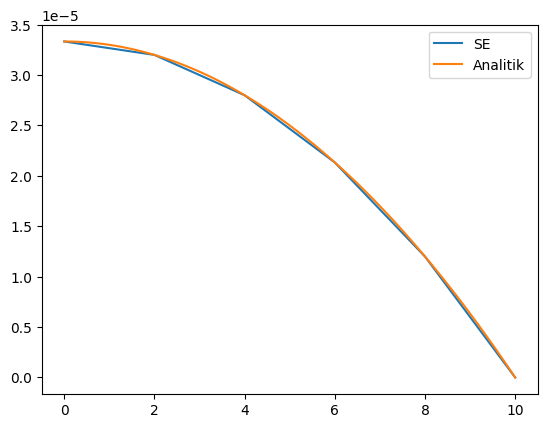

In [129]:
x_analitik = np.linspace(0,cubuk.L,100)
u_analitik = b*(cubuk.L**2-x_analitik**2)/(2*A*E)
plt.plot(cubuk.koordinatlar,u,label='SE')
plt.plot(x_analitik,u_analitik,label='Analitik')
plt.legend();

Görülebileceği üzere sonlu elemanlar çözümü analitik çözüme oldukça yakındır. Eleman sayısı arttırılıp azaltılarak sonuca etkisi görsel olarak hızlıca görülebilir. Bu dersin tamamlanması ile 1 boyutlu elastik çubuğun eksenel yük altında şekil değiştirmesi problemini sonlu elemanlar yöntemi ile çözümünü bitirmiş oluyoruz.